In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams

In [2]:
df = pd.read_csv('/kaggle/input/iitpolitenesslevels/PolitenessTone-COMBINED.csv')
df.drop(['Venue', 'Review ID', 'Annotated By', 'Date', 'Journal name', 'ESI', 'Article title', 'Review URL'], axis=1, inplace=True)
df.head()

,review,N/C,Tone
0,Please refer to the paper Discovering structur...,4.0,5.0
1,One issue of the use of cross task transfer pe...,5.0,3.0
2,Learning incoherent sparse and low rank patter...,3.0,3.0
3,"However , a disadvantage of the proposed metho...",3.0,3.0
4,- Comparison with existing clustered MTL metho...,4.0,3.0


In [3]:
def printngrams_withoutstopwords(n, level, df, add_stp_words):
    politness_levels =['Highly Impolite', 'Impolite', 'Neutral', 'Polite', 'Highly Polite']
    overall_ngrams = [] 
    for index, row in df.iterrows():
        n_grams=ngrams(sequence=nltk.word_tokenize(row['review']), n=n)
        for grams in n_grams:
            overall_ngrams.append(grams)
            
    stops = ["a", "and", "it", "the", "is", "be", 'the', '', '.', "..", '--', '-', ',', ',,', 'in', ':', '`', '``']+ add_stp_words
    clean = [gram for gram in overall_ngrams if not any(stop in gram for stop in stops)]
            
    ngram_counts = {}
    for gram in clean:
        ngram_counts[gram] = ngram_counts.get(gram, 0) + 1

    import operator

    ordered_ngrams = dict(sorted(ngram_counts.items(), key=operator.itemgetter(1), reverse=True))

    most_common_ngram_keys = list(ordered_ngrams.keys())[:10]
    for i in range(len(most_common_ngram_keys)):
        most_common_ngram_keys[i] = " ".join(most_common_ngram_keys[i])
    most_common_ngram_values = list(ordered_ngrams.values())[:10]
    
    
    print(most_common_ngram_keys)
    print(most_common_ngram_values)

#     PLOT 
    plt.figure(figsize=(15, 10))
    plt.barh([str(i) for i in most_common_ngram_keys], most_common_ngram_values)
    title = 'Most frequently occuring words for '+politness_levels[level-1]+' politeness level'
    plt.title(title, fontsize=20)
    plt.xlabel('Commonly occured words/phrases', fontsize=19, labelpad=20)
    plt.ylabel('Frequency of occurence of words/phrases', fontsize=19, labelpad=20)
    plt.tick_params(axis='both', which='major', labelsize=15, )
    plt.gca().invert_yaxis()
    plt.show()

['Thank you for', 'you for your', 'I have no', 'Could you please', 'I would like', 'would like to', 'for addressing my', 'very well written', 'well written (', 'builds on existing']
[11, 4, 4, 3, 3, 3, 3, 2, 2, 2]


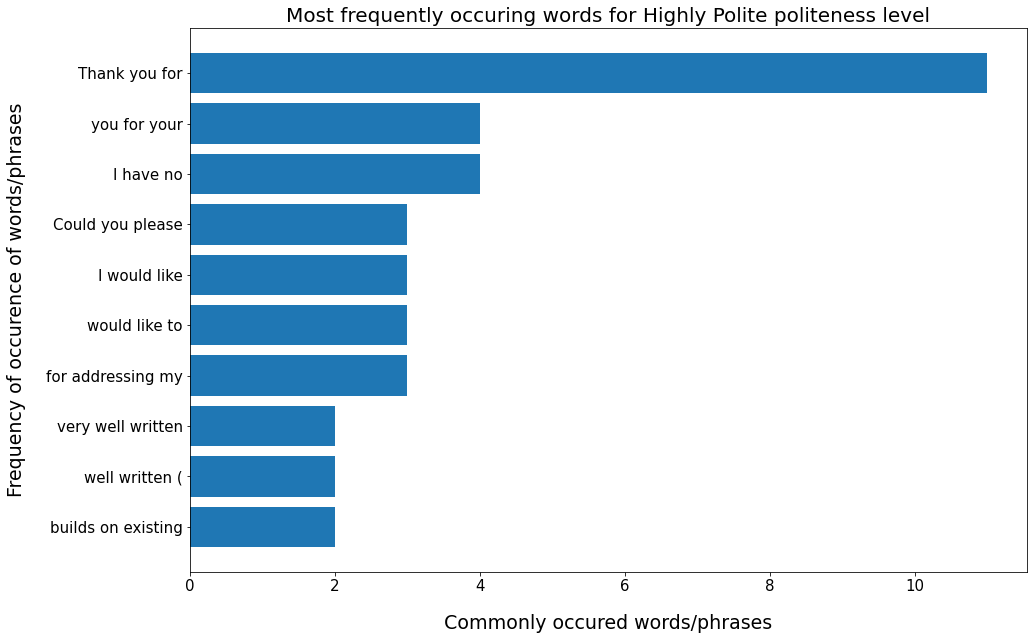

In [4]:
# HIGHLY POLITE
printngrams_withoutstopwords(3, 5, df[df['Tone'] == 5],[])

['The authors have', 'The authors propose', 'The paper proposes', 'of this paper', 'authors do not', 'I have no', 'have no further', 'I think this', 'would have been', 'very well written']
[17, 6, 6, 5, 5, 5, 5, 4, 4, 4]


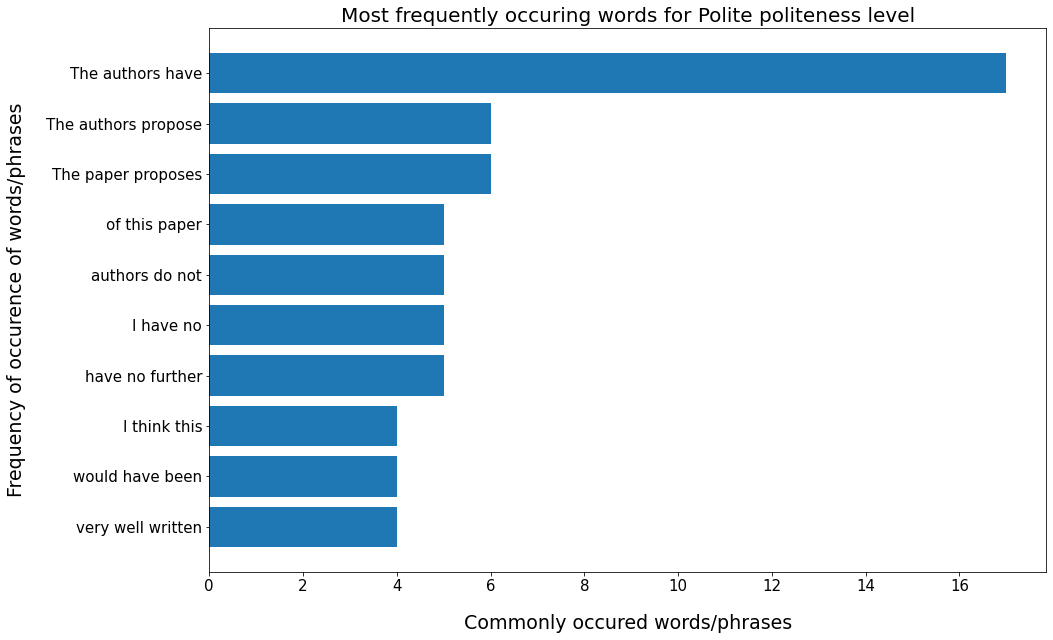

In [5]:
# POLITE
printngrams_withoutstopwords(3, 4, df[df['Tone'] == 4] ,[])

['I do not', 'I am not', 'of this paper', 'The authors are', 'I have no', 'have no further', 'This paper proposes', 'hard to read', 'not clear whether', 'clear to me']
[9, 8, 7, 6, 6, 6, 5, 5, 5, 5]


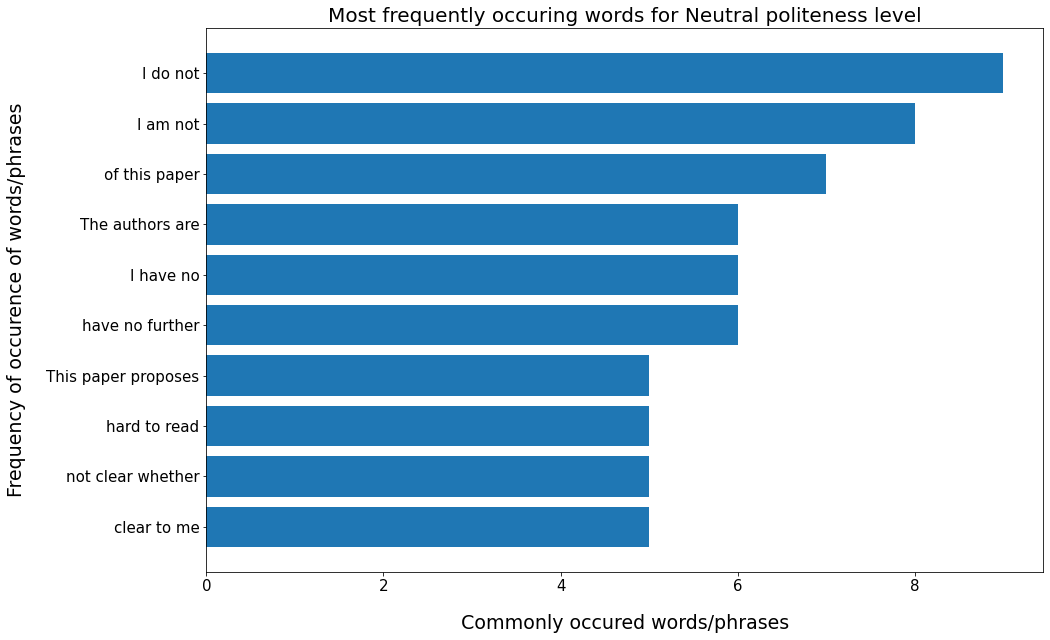

In [6]:
# NEUTRAL
printngrams_withoutstopwords(3, 3, df[df['Tone'] == 3] ,[])

['I am not', 'I do not', "I do n't", 'of this paper', 'am not sure', 'not clear to', 'clear to me', 'they are useful', 'how they are', 'I dont think']
[14, 10, 10, 7, 5, 5, 5, 4, 4, 4]


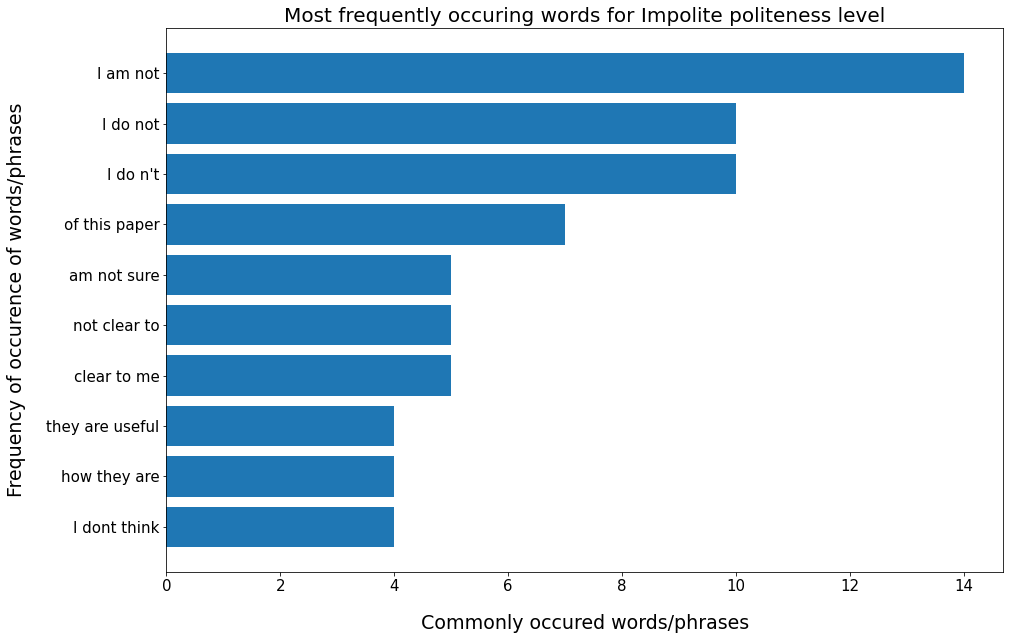

In [7]:
# IMPOLITE
printngrams_withoutstopwords(3, 2, df[df['Tone'] == 2] ,[])

['piece of work', 'Did all 5', 'of work I', 'work I am', 'I am proud', 'am proud to', 'proud to have', 'to have my', 'have my name', 'my name on']
[5, 3, 3, 3, 3, 3, 3, 3, 3, 3]


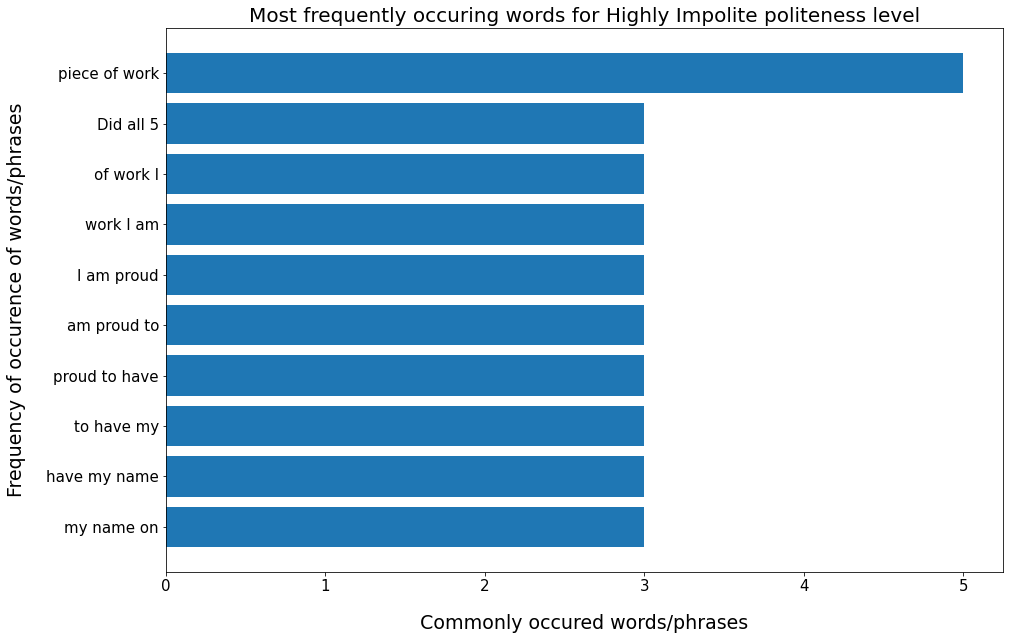

In [8]:
# HIGHLY IMPOLITE
printngrams_withoutstopwords(3, 1, df[df['Tone'] == 1] , ['author', 'authors', 'paper'])

___

# MODEL ANALYSIS

In [9]:
import numpy as np 
import pandas as pd 
import csv
import pickle
import matplotlib.pyplot as plt

In [10]:
Custom_ACCURACY = [0.5146198868751526, 0.6982455849647522, 0.7801169753074646, 0.7976608276367188, 0.8432748317718506, 0.8549707531929016, 0.871345043182373, 0.8830409646034241, 0.8830409646034241, 0.8842105269432068, 0.898245632648468, 0.886549711227417, 0.8842105269432068, 0.8807017803192139, 0.8912280797958374, 0.8959064483642578, 0.8853800892829895, 0.898245632648468, 0.8888888955116272, 0.8947368264198303, 0.898245632648468, 0.8912280797958374, 0.9052631855010986, 0.8947368264198303, 0.898245632648468, 0.8830409646034241, 0.8994151949882507, 0.9040935635566711, 0.898245632648468, 0.9005848169326782]
HateACCURACY = [0.35789474844932556, 0.378947377204895, 0.3754386007785797, 0.4514620006084442, 0.4467836320400238, 0.46666666865348816, 0.46432748436927795, 0.49356725811958313, 0.49356725811958313, 0.46315789222717285, 0.49707603454589844, 0.5111111402511597, 0.49473685026168823, 0.49941521883010864, 0.5029239654541016, 0.49824562668800354, 0.5111111402511597, 0.5099415183067322, 0.504093587398529, 0.49941521883010864, 0.5111111402511597, 0.5181286334991455, 0.5426900386810303, 0.5356724858283997, 0.530994176864624, 0.5426900386810303, 0.5251461863517761, 0.5391812920570374, 0.5368421077728271, 0.5450292229652405]
ToxicACCURACY =  [0.45497074723243713, 0.504093587398529, 0.5064327716827393, 0.5426900386810303, 0.5438596606254578, 0.5637426972389221, 0.5555555820465088, 0.5707602500915527, 0.5801169872283936, 0.582456111907959, 0.6011695861816406, 0.6116958856582642, 0.6187134385108948, 0.6175438761711121, 0.6292397379875183, 0.6233918070793152, 0.6304093599319458, 0.6257309913635254, 0.6432748436927795, 0.6409356594085693, 0.6374269127845764, 0.6421052813529968, 0.6491228342056274, 0.6526315808296204, 0.6584795117378235, 0.6608186960220337, 0.6678362488746643, 0.6619883179664612, 0.6573099493980408, 0.6830409169197083]
SciACCURACY =  [0.4514620006084442, 0.49941521883010864, 0.504093587398529, 0.5087719559669495, 0.5391812920570374, 0.5333333611488342, 0.5614035129547119, 0.557894766330719, 0.5625730752944946, 0.5345029234886169, 0.5754386186599731, 0.5906432867050171, 0.5684210658073425, 0.6011695861816406, 0.6222222447395325, 0.6070175170898438, 0.6011695861816406, 0.6280701756477356, 0.6175438761711121, 0.5988304018974304, 0.6245614290237427, 0.59415203332901, 0.6280701756477356, 0.6257309913635254, 0.6233918070793152, 0.6502923965454102, 0.6409356594085693, 0.6385964751243591, 0.6502923965454102, 0.6491228342056274]

In [11]:
CustomLoss = [1.1880289316177368, 0.7501484155654907, 0.6081826090812683, 0.5714677572250366, 0.5087012648582458, 0.51040118932724, 0.5210713148117065, 0.5157092809677124, 0.5571981072425842, 0.5627938508987427, 0.5458540320396423, 0.5890033841133118, 0.6584041714668274, 0.6615470051765442, 0.5864522457122803, 0.5941195487976074, 0.6670917272567749, 0.6258520483970642, 0.6743599772453308, 0.6887890100479126, 0.6861578226089478, 0.739047646522522, 0.6846095323562622, 0.7376529574394226, 0.7669781446456909, 0.742328405380249, 0.6109121441841125, 0.6755220293998718, 0.6481001377105713, 0.6952553987503052]
HateLoss = [1.4610376358032227, 1.4045273065567017, 1.3755154609680176, 1.3065874576568604, 1.318406105041504, 1.2879290580749512, 1.2871953248977661, 1.2364706993103027, 1.2295081615447998, 1.2584378719329834, 1.2128219604492188, 1.2195563316345215, 1.2047330141067505, 1.2107418775558472, 1.181931495666504, 1.180958867073059, 1.170358419418335, 1.1668208837509155, 1.1809065341949463, 1.1983760595321655, 1.1748952865600586, 1.150666356086731, 1.1364845037460327, 1.1318005323410034, 1.1288865804672241, 1.123174786567688, 1.1214908361434937, 1.1111423969268799, 1.1063634157180786, 1.1241875886917114]
ToxicLOSS =  [1.3056681156158447, 1.2258965969085693, 1.1828925609588623, 1.133978247642517, 1.1100621223449707, 1.085702896118164, 1.0697486400604248, 1.0522102117538452, 1.037404179573059, 1.0226937532424927, 1.002163052558899, 0.9876770973205566, 0.9881002306938171, 0.9808213114738464, 0.9720231294631958, 0.9599971771240234, 0.9473506212234497, 0.9430174231529236, 0.927257776260376, 0.929269015789032, 0.9284074306488037, 0.9074291586875916, 0.9092421531677246, 0.8933293223381042, 0.8941584825515747, 0.8874987959861755, 0.8802106380462646, 0.8736233711242676, 0.8748908638954163, 0.8671162128448486]
SciLOSS =  [1.3074020147323608, 1.2216308116912842, 1.1627756357192993, 1.1555142402648926, 1.1008100509643555, 1.1014139652252197, 1.0678136348724365, 1.0751593112945557, 1.0539292097091675, 1.0521491765975952, 1.0531318187713623, 1.0101673603057861, 1.0223069190979004, 0.9950394034385681, 0.9926117062568665, 0.9799700975418091, 0.9822090268135071, 0.9715620875358582, 0.9610973596572876, 0.9702715277671814, 0.9735056757926941, 0.9599194526672363, 0.9501837491989136, 0.9465465545654297, 0.9393977522850037, 0.9323447942733765, 0.935649573802948, 0.9300633668899536, 0.959581732749939, 0.9147202372550964]

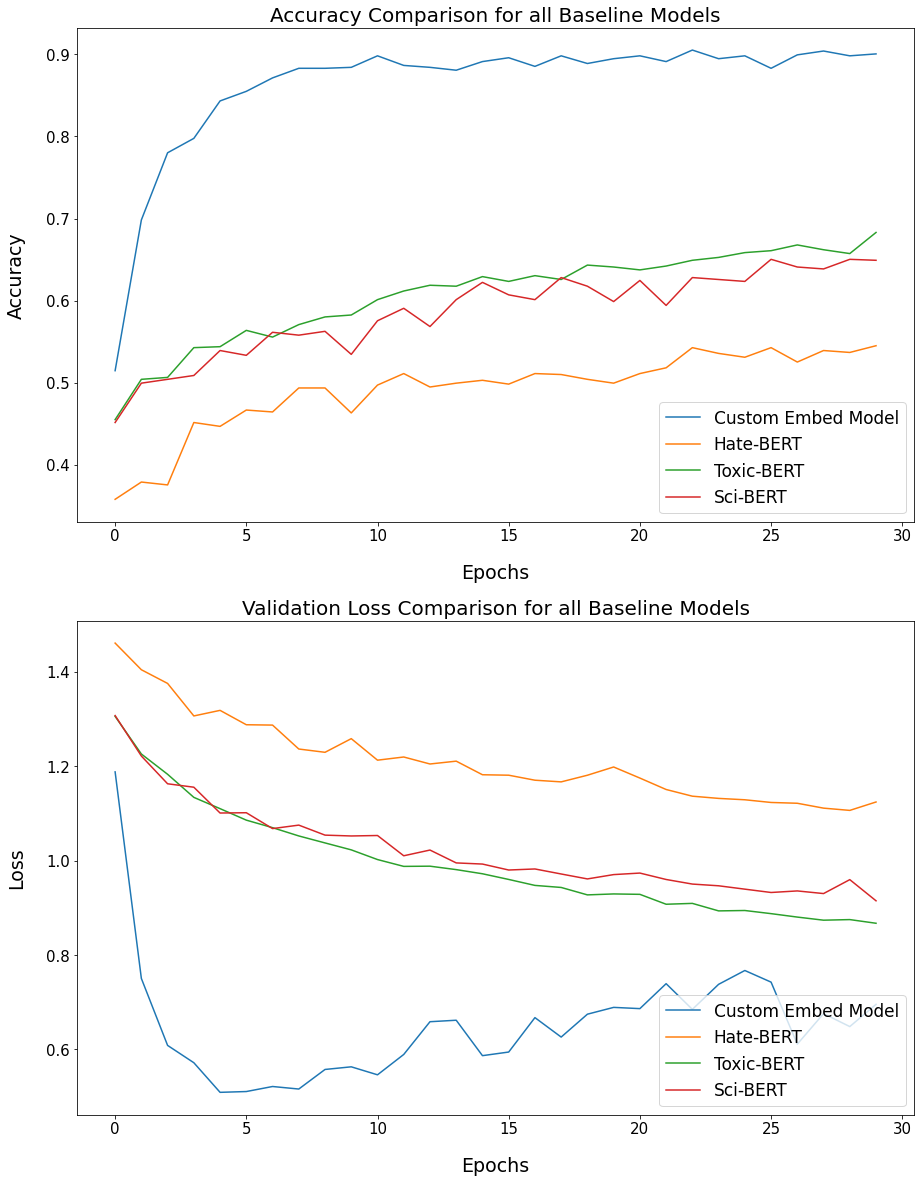

In [12]:
epochs_range = np.arange(len(CustomLoss))

plt.figure(figsize=(15, 20))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, Custom_ACCURACY, label='Custom Embed Model')
plt.plot(epochs_range, HateACCURACY, label='Hate-BERT')
plt.plot(epochs_range, ToxicACCURACY, label='Toxic-BERT')
plt.plot(epochs_range, SciACCURACY, label='Sci-BERT')
plt.title('Accuracy Comparison for all Baseline Models', fontsize=20)
plt.xlabel('Epochs', fontsize=19, labelpad=20)
plt.ylabel('Accuracy', fontsize=19, labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=15, )
plt.legend(fontsize=17, loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, CustomLoss, label='Custom Embed Model')
plt.plot(epochs_range, HateLoss, label='Hate-BERT')
plt.plot(epochs_range, ToxicLOSS, label='Toxic-BERT')
plt.plot(epochs_range, SciLOSS, label='Sci-BERT')
plt.title('Validation Loss Comparison for all Baseline Models', fontsize=20)
plt.xlabel('Epochs', fontsize=19, labelpad=20)
plt.ylabel('Loss', fontsize=19, labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=17, loc='lower right')

plt.show()